 # <h1 style='background:#6daa9f; border:0; color:black'><center>HEART FAILURE</center></h1> 
 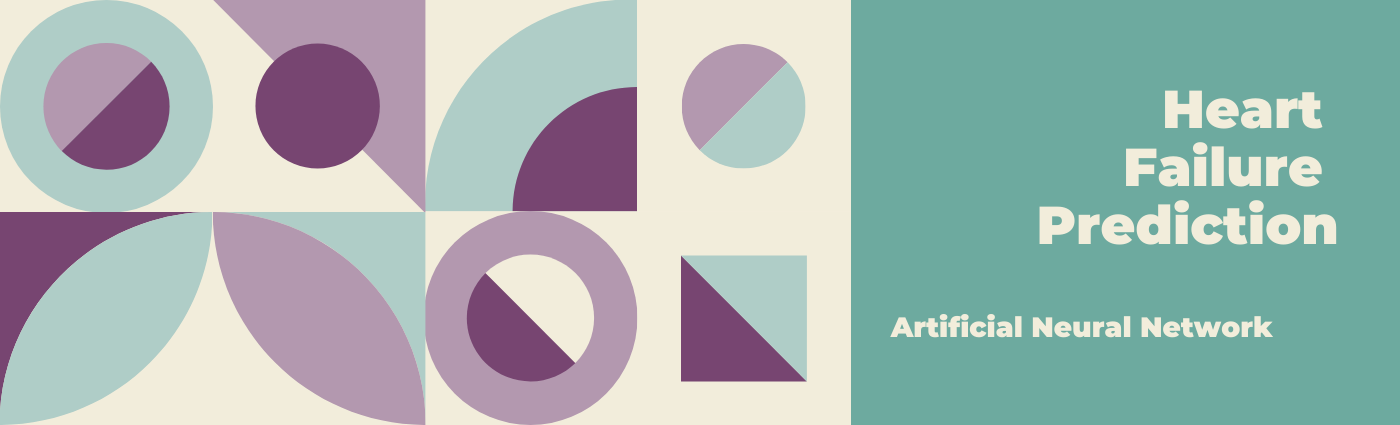

Cardiovascular diseases are the most common cause of deaths globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by Cardiovascular diseases. It is characterized by the heart’s inability to pump an adequate supply of blood to the body. Without sufficient blood flow, all major body functions are disrupted. Heart failure is a condition or a collection of symptoms that weaken the heart. 



# **<span style="color:#6daa9f;">IMPORTING LIBRARIES</span>**


In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **<span style="color:#6daa9f;">LOADING DATA</span>**

In [2]:
#loading data
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**About the data:**

* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient
* smoking: If the patient smokes actively or ever did in past
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period


# **<span style="color:#6daa9f;">DATA ANALYSIS</span>**

Steps in data analysis and visulisation:

We begin our analysis by plotting a count plot of the targer attribute. 
A corelation matrix od the various attributes to examine the feature importance.



<Axes: xlabel='DEATH_EVENT', ylabel='count'>

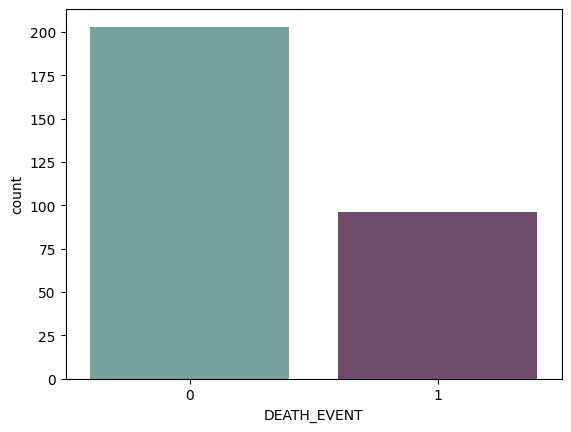

In [4]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#6daa9f","#774571"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

Point to note is that there is an imbalance in the data.

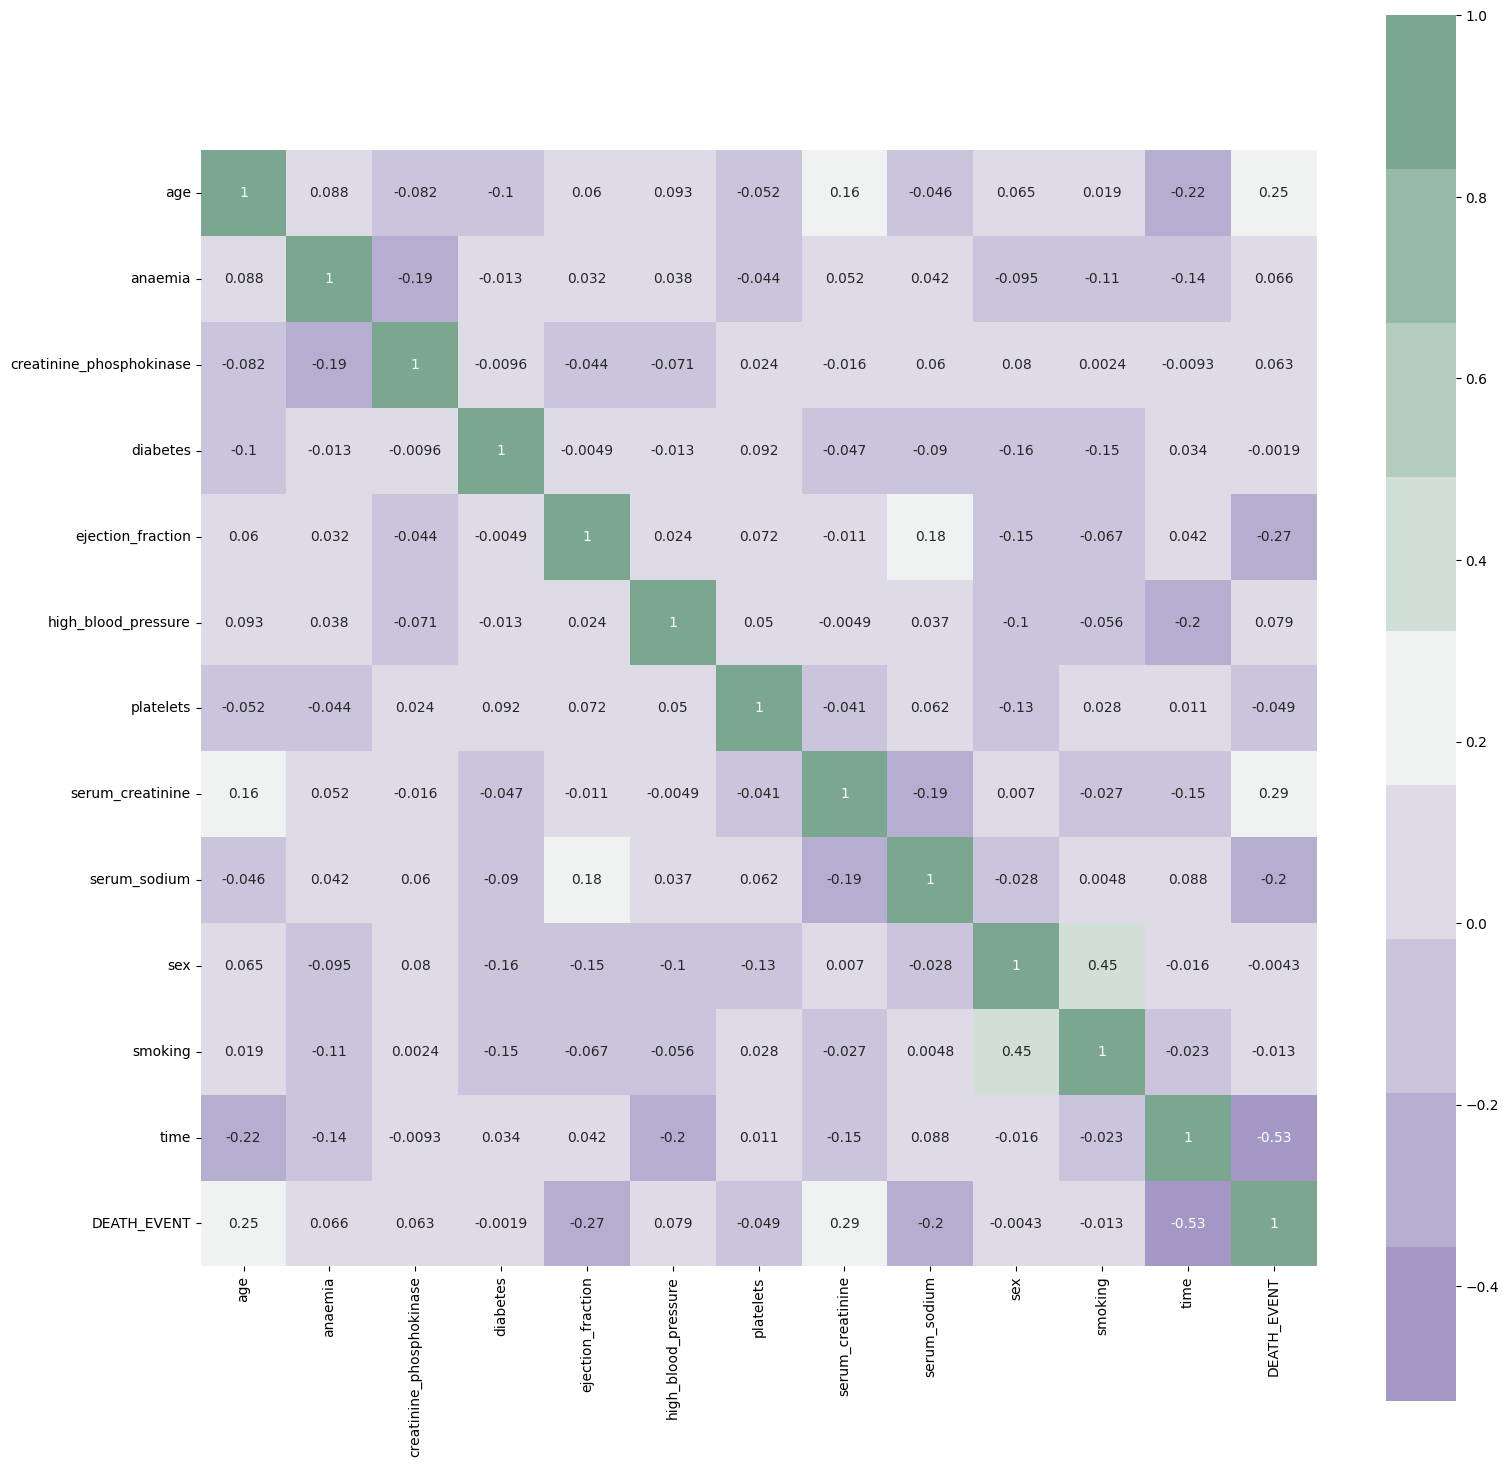

In [5]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

**Notable points:**
* Time of the patient's follow-up visit for the disease is crucial in as initial diagnosis with cardiovascular issue and treatment reduces the chances of any fatality. It holds and inverse relation. 
* Ejection fraction is the second most important feature. It is quite expected as it is basically the efficiency of the heart.
* Age of the patient is the third most correlated feature. Clearly as heart's functioning declines with ageing 

**Next, we will examine the count plot of age.**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# **<span style="color:#6daa9f;">DATA PREPROCESSING</span>**

**Steps involved in Data Preprocessing** 
* Dropping the outliers based on data analysis
* Assigning values to features as X and target as y
* Perform the scaling of the features
* Split test and training sets

In [7]:
#assigning values to features as X and target as y
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

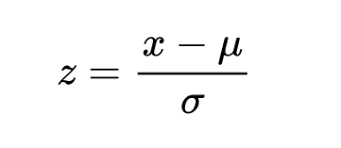

In [8]:
def StandardScaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    a=((X - mean) / std)
    return a.to_numpy()


In [9]:
#Set up a standard scaler for the features
col_names = list(X.columns)
X_df= StandardScaler(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.822173e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.544658e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,-2.450660e-17,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,6.238042e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-1.633773e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-3.564596e-17,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.544658e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.495620e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [10]:
def train_test_split(X, y, test_ratio=0.2, random_state=None):
   
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = X.shape[0]
    shuffle_idx = np.random.permutation(num_samples)
    test_size = int(num_samples * test_ratio)

    X_train = X.iloc[shuffle_idx[test_size:],:]
    y_train = y.iloc[shuffle_idx[test_size:]]
    X_test = X.iloc[shuffle_idx[:test_size],:]
    y_test = y.iloc[shuffle_idx[:test_size]]

    return X_train, X_test, y_train, y_test

In [11]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_ratio=0.2,random_state=42)
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
layers_dims = [X_train.shape[0], 5,3, 1]
X_train

array([[ 9.40311555e-01, -8.71104775e-01, -2.24886516e-01, ...,
         7.35688190e-01,  1.45416070e+00, -9.19681287e-01],
       [ 1.19294523e+00,  1.14796753e+00, -3.46703786e-01, ...,
         7.35688190e-01, -6.87681906e-01, -1.55206738e+00],
       [ 1.19294523e+00, -8.71104775e-01, -4.98459199e-01, ...,
         7.35688190e-01, -6.87681906e-01,  4.09620097e-01],
       ...,
       [-4.91279276e-01, -8.71104775e-01,  1.71535786e-01, ...,
         7.35688190e-01, -6.87681906e-01, -5.45411965e-01],
       [-1.41760275e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01,  1.45416070e+00,  1.46789887e+00],
       [ 1.61400136e+00, -8.71104775e-01,  3.26388248e-01, ...,
         7.35688190e-01,  1.45416070e+00, -5.58317804e-01]])

In [12]:
class ANN:
    
    def predict(self,X, y, parameters):
        m = X.shape[1]
        p = np.zeros((1,m), dtype = np.int64)
        a3, caches = self.forward_propagation(X, parameters)
        for i in range(0, a3.shape[1]):
            if a3[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
#         print("Accuracy: "  + str(np.mean((p[0,:] == y[0]))))
        a=str(np.mean((p[0,:] == y[0])))
        return p,a

    def update_parameters_with_gd(self,parameters, grads, learning_rate):
        L = len(parameters) // 2 # number of layers in the neural networks
        for l in range(L):
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        return parameters

    def backward_propagation(self,X, Y, cache):
        m = X.shape[1]
        (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache

        dz3 = 1./m * (a3 - Y)
        dW3 = np.dot(dz3, a2.T)
        db3 = np.sum(dz3, axis=1, keepdims = True)
        
        da2 = np.dot(W3.T, dz3)
        dz2 = np.multiply(da2, np.int64(a2 > 0))
        dW2 = np.dot(dz2, a1.T)
        db2 = np.sum(dz2, axis=1, keepdims = True)
        
        da1 = np.dot(W2.T, dz2)
        dz1 = np.multiply(da1, np.int64(a1 > 0))
        dW1 = np.dot(dz1, X.T)
        db1 = np.sum(dz1, axis=1, keepdims = True)
        
        gradients = {"dz3": dz3, "dW3": dW3, "db3": db3,
                 "da2": da2, "dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
        return gradients

    def compute_cost(self,a3, Y):
        m = Y.shape[1]
        logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
        cost = 1./m * np.sum(logprobs)
        return cost

    def relu(self,x):
        s = np.maximum(0,x)
        return s
    
    def sigmoid(self,x):
        s = 1/(1+np.exp(-x))
        return s


    def forward_propagation(self,X, parameters):
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        W3 = parameters["W3"]
        b3 = parameters["b3"]
    
        z1 = np.dot(W1, X) + b1
        a1 = self.relu(z1)
        z2 = np.dot(W2, a1) + b2
        a2 = self.relu(z2)
        z3 = np.dot(W3, a2) + b3
        a3 = self.sigmoid(z3)
    
        cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)
    
        return a3, cache

    def random_mini_batches(self,X, Y, mini_batch_size = 64, seed = 0):
    
        np.random.seed(seed)            
        m = X.shape[1]                 
        mini_batches = []
        
        permutation = list(np.random.permutation(m))   
        shuffled_X = X[:, permutation]
        shuffled_Y = Y[permutation].reshape((1, m))

        num_complete_minibatches = math.floor(m/mini_batch_size) 
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
    
        if m % mini_batch_size != 0:
            mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : ]
            mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : ]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)
    
        return mini_batches

    def initialize_parameters(self,layer_dims):
        np.random.seed(3)
        parameters = {}
        L = len(layer_dims) # number of layers in the network

        for l in range(1, L):
            parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
            assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
            assert (parameters['W' + str(l)].shape == layer_dims[l], 1)
        
        return parameters
    # GRADED FUNCTION: update_parameters_with_momentum

    def update_parameters_with_momentum(self,parameters, grads, v, beta, learning_rate):
  
        L = len(parameters) // 2
        for l in range(L):
            v["dW" + str(l+1)] = beta * v["dW" + str(l+1)] + (1 - beta) * grads["dW" + str(l+1)]
            v["db" + str(l+1)] = beta * v["db" + str(l+1)] + (1 - beta) * grads["db" + str(l+1)]
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v["dW" + str(l+1)]
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v["db" + str(l+1)]
        
        return parameters, v

    def initialize_velocity(self,parameters):
        L = len(parameters) // 2 
        v = {}
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters["W"+str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters["b"+str(l+1)].shape)
        return v
    
    def update_parameters_with_adam(self,parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
        L = len(parameters) // 2                 
        v_corrected = {}                         
        s_corrected = {}                         
    
        for l in range(L):
            v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1 - beta1) * grads["dW" + str(l+1)]
            v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1 - beta1) * grads["db" + str(l+1)]
            v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1 - beta1)
            v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1 - beta1)
            s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1 - beta2) * (grads["dW" + str(l+1)] * grads["dW" + str(l+1)])
            s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1 - beta2) * (grads["db" + str(l+1)] * grads["db" + str(l+1)])
            s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1 - beta2)
            s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1 - beta2)
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v_corrected["dW" + str(l+1)] / (np.sqrt(s_corrected["dW" + str(l+1)]) + epsilon)
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v_corrected["db" + str(l+1)] / (np.sqrt(s_corrected["db" + str(l+1)]) + epsilon)

        return parameters, v, s

    def initialize_adam(self,parameters):
        L = len(parameters) // 2 
        v = {}
        s = {}
        for l in range(L):
            v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
            v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
            s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
            s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)    
        return v, s
    
    def model(self,X, Y, layers_dims, optimizer, learning_rate = 0.001, mini_batch_size =64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 100, print_cost = True):
        acc=0
        L = len(layers_dims)            
        costs = []
        accuracy=[]
        t = 0                            
        seed = 10                        
        parameters = self.initialize_parameters(layers_dims)
        
        if optimizer == "gd":
            pass 
        elif optimizer == "momentum":
            v = self.initialize_velocity(parameters)
        elif optimizer == "adam":
            v, s = self.initialize_adam(parameters)
    
        for i in range(num_epochs):
            seed = seed + 1
            minibatches = self.random_mini_batches(X, Y, mini_batch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                a3, caches = self.forward_propagation(minibatch_X, parameters)
                cost = self.compute_cost(a3, minibatch_Y)
                grads = self.backward_propagation(minibatch_X, minibatch_Y, caches)
                if optimizer == "gd":
                    parameters = self.update_parameters_with_gd(parameters, grads, learning_rate)
                elif optimizer == "momentum":
                    parameters, v = self.update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
                elif optimizer == "adam":
                    t = t + 1 
                    parameters, v, s = self.update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
            
            if print_cost and i % 1 == 0:
                p,a=self.predict(minibatch_X, minibatch_Y, parameters)
                print ("Cost after epoch %i: %f" %(i, cost),'Accuracy: ',a)
            if print_cost and i % 1 == 0:
                costs.append(cost)
                p,a=self.predict(minibatch_X, minibatch_Y, parameters)
                accuracy.append(float(a))
            if print_cost and i == 999:
                p,a=self.predict(minibatch_X, minibatch_Y, parameters)
                acc=a
                
        
        plt.plot(costs)
        plt.ylabel('cost')
        plt.xlabel('epochs')
        plt.title("Cost @ Learning rate = " + str(learning_rate))
        plt.show()
        
        plt.plot(accuracy)
        plt.ylabel('accuracy')
        plt.xlabel('epochs')
        plt.title("Accuracy @ Learning rate = " + str(learning_rate))
        plt.show()
        print ('Accuracy: ',acc)
        return parameters

<>:115: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:116: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:115: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:116: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_18086/2831151180.py:115: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/p9/wv3jwcsd19x8pf3r2kfnj0580000gn/T/ipykernel_18086/2831151180.py:116: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (parameters['W' + str(l)].shape == layer_dims[l], 1)


In [13]:

# sgd=ANN()
# sgd_parameters = sgd.model(X_train, y_train, layers_dims, optimizer = "gd")


In [14]:
# moment=ANN()
# moment_parameters = moment.model(X_train, y_train, layers_dims, beta = 0.9, optimizer = "momentum")


Cost after epoch 0: 0.730350 Accuracy:  0.6666666666666666
Cost after epoch 1: 0.702278 Accuracy:  0.6666666666666666
Cost after epoch 2: 0.668931 Accuracy:  0.6666666666666666
Cost after epoch 3: 0.637067 Accuracy:  0.6666666666666666
Cost after epoch 4: 0.602027 Accuracy:  0.6666666666666666
Cost after epoch 5: 0.573548 Accuracy:  0.6666666666666666
Cost after epoch 6: 0.549333 Accuracy:  0.75
Cost after epoch 7: 0.525332 Accuracy:  0.75
Cost after epoch 8: 0.502236 Accuracy:  0.75
Cost after epoch 9: 0.481115 Accuracy:  0.75
Cost after epoch 10: 0.461613 Accuracy:  0.8333333333333334
Cost after epoch 11: 0.446031 Accuracy:  0.9166666666666666
Cost after epoch 12: 0.431619 Accuracy:  0.9166666666666666
Cost after epoch 13: 0.418062 Accuracy:  0.9166666666666666
Cost after epoch 14: 0.406012 Accuracy:  0.9166666666666666
Cost after epoch 15: 0.395370 Accuracy:  1.0
Cost after epoch 16: 0.384389 Accuracy:  1.0
Cost after epoch 17: 0.374689 Accuracy:  1.0
Cost after epoch 18: 0.365399 A

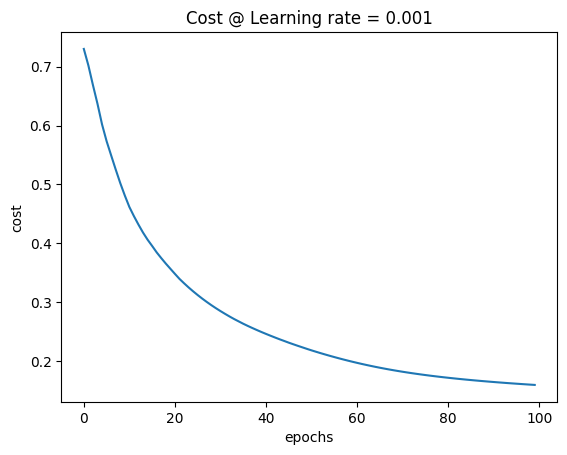

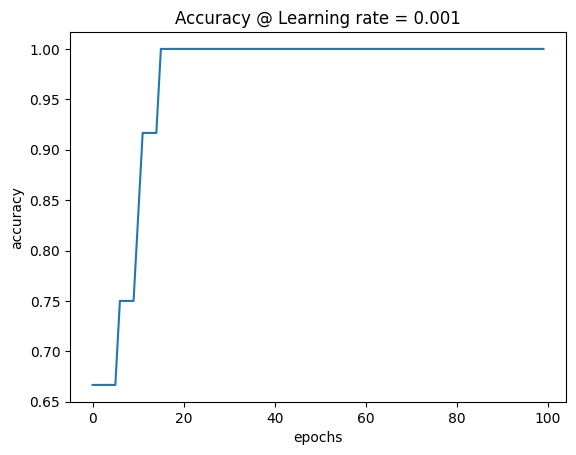

Accuracy:  0


In [15]:
adam=ANN()
adam_parameters = adam.model(X_train, y_train, layers_dims, optimizer = "adam")

2023-02-22 11:52:15.006319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Cost after epoch 0: 0.668752 Accuracy:  0.5833333333333334
Cost after epoch 1: 0.662160 Accuracy:  0.5833333333333334
Cost after epoch 2: 0.653579 Accuracy:  0.5833333333333334
Cost after epoch 3: 0.643796 Accuracy:  0.5833333333333334
Cost after epoch 4: 0.632863 Accuracy:  0.5833333333333334
Cost after epoch 5: 0.621006 Accuracy:  0.5833333333333334
Cost after epoch 6: 0.609290 Accuracy:  0.5833333333333334
Cost after epoch 7: 0.598073 Accuracy:  0.5833333333333334
Cost after epoch 8: 0.586470 Accuracy:  0.5833333333333334
Cost after epoch 9: 0.574818 Accuracy:  0.5833333333333334
Cost after epoch 10: 0.563760 Accuracy:  0.5833333333333334
Cost after epoch 11: 0.554080 Accuracy:  0.5833333333333334
Cost after epoch 12: 0.544725 Accuracy:  0.5833333333333334
Cost after epoch 13: 0.535931 Accuracy:  0.5833333333333334
Cost after epoch 14: 0.527069 Accuracy:  0.5833333333333334
Cost after epoch 15: 0.518203 Accuracy:  0.5833333333333334
Cost after epoch 16: 0.509386 Accuracy:  0.583333

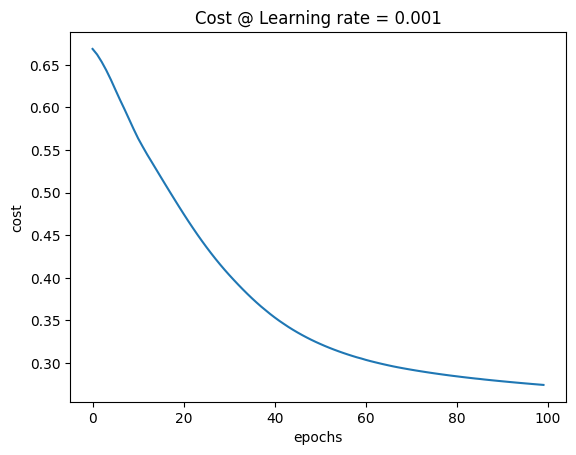

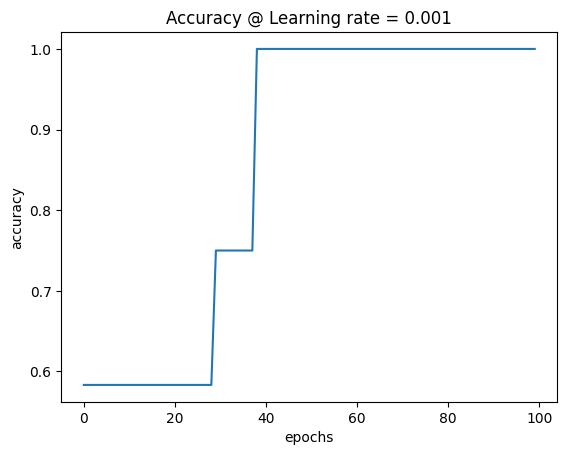

Accuracy:  0
Time Taken: 0.24 seconds
CPU Usage: 28.5%
Memory Usage: 422.88 MB


In [16]:
# Measure CPU usage
import psutil
import tensorflow as tf
import time

# Measure time taken for training
start_time = time.time()
print()

layers_dims = [X_train.shape[0], 5, 2, 1]
parameters = adam.model(X_train, y_train, layers_dims, optimizer = "adam")

end_time = time.time()
print("Time Taken: {:.2f} seconds".format(end_time - start_time))

cpu_percent = psutil.cpu_percent(interval=None)
print("CPU Usage: {}%".format(cpu_percent))

# Measure memory usage
process = psutil.Process()
memory_info = process.memory_info()
print("Memory Usage: {:.2f} MB".format(memory_info.rss / 1024 / 1024))